In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('filename.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1540889350556323840,1540871798111277057,2022-06-26 02:47:04 UTC,2022-06-26,02:47:04,0,1420881295995924484,adedetective,Bronson 🩸,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AZmilitary1', 'name': 'AZ 🛰🌏...",NaN,NaN,NaN,NaN
1,1540889343429996544,1540889343429996544,2022-06-26 02:47:02 UTC,2022-06-26,02:47:02,0,838321345570156545,rogue_corq,🇺🇦🐱🖤🕊️ VAXXED THO 🏳️‍🌈🖤🐱🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1540889343211909120,1540889343211909120,2022-06-26 02:47:02 UTC,2022-06-26,02:47:02,0,1466873137534947329,peterpo06383558,Peter Ponce,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1540889331778330624,1540889331778330624,2022-06-26 02:46:59 UTC,2022-06-26,02:46:59,0,130065700,ceciliabtory,Cecilia Bartholemew,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1540889311142416384,1540355482489085955,2022-06-26 02:46:54 UTC,2022-06-26,02:46:54,0,144496636,hifranc,Francisco,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'leggylesbean', 'name': 'Shae...",NaN,NaN,NaN,NaN


Let’s have a quick look at all the column names of the dataset:

In [3]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward:

In [4]:
df = df[['username', 'tweet', 'language']]
df.head()

,username,tweet,language
0,adedetective,"@AZmilitary1 Russia has been ""running out of e...",en
1,rogue_corq,Blockade of Kaliningrad: Lukashenko says Lithu...,en
2,peterpo06383558,the Russia Putin who told them Croatia for the...,en
3,ceciliabtory,This would explain why #Belarus is helping #Ru...,en
4,hifranc,@leggylesbean @jazz_inmypants @swordsjew Simil...,en


In [5]:
df.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language:

In [6]:
df['language'].value_counts()

en     8681
pt      530
it      145
qme     113
in      106
und      68
ca       55
es       53
ja       50
tl       25
ru       22
ur       17
qam      12
ar       11
fr       10
hi       10
vi        9
fi        8
de        8
qht       8
th        7
nl        7
et        7
tr        7
pl        5
ro        4
uk        4
ht        3
cs        3
ko        3
am        3
zh        3
da        2
fa        2
sv        2
kn        2
te        1
eu        1
no        1
lt        1
Name: language, dtype: int64

So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets:

In [7]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text) # For removing Punctutations from string
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = ' '.join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = ' '.join(text)
    return text

df['tweet'] = df['tweet'].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

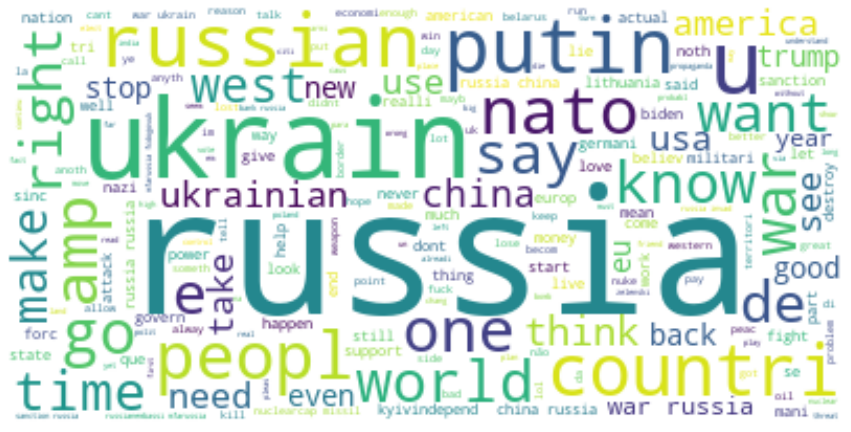

In [9]:
text= ' '.join(i for i in df.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= 'white').generate(text)
plt.figure(figsize= (15,10))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [10]:
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['tweet']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['tweet']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['tweet']]
df = df[['tweet', 'Positive', 'Negative', 'Neutral']]
df.head()

,tweet,Positive,Negative,Neutral
0,russia run everyth whole time keep spew driv...,0.000,0.000,1.000
1,blockad kaliningrad lukashenko say lithuania d...,0.000,0.358,0.642
2,russia putin told croatia nazism satan deceiv way,0.000,0.000,1.000
3,would explain belarus help russia destroy ukra...,0.141,0.182,0.677
4,leggylesbean jazzinmyp swordsjew similar illus...,0.000,0.000,1.000


Now lets check positive words in these tweets

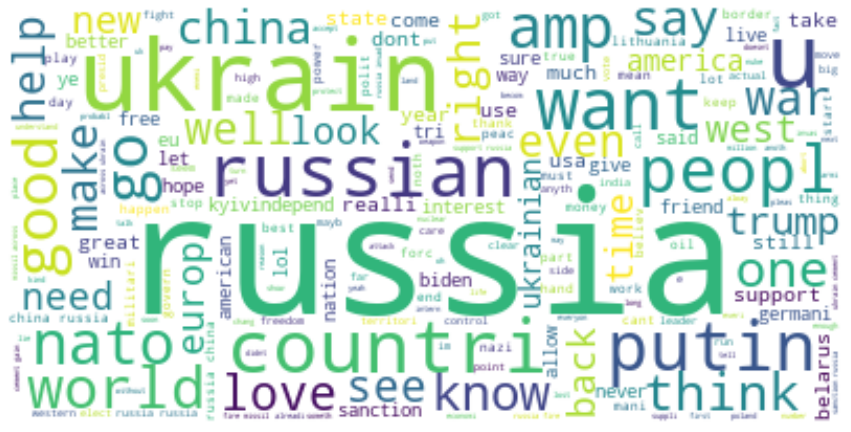

In [11]:
positive = ' '.join([i for i in df['tweet'][df['Positive'] > df['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= 'white').generate(positive)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

Now let’s have a look at the most frequent words used by people with negative sentiments:

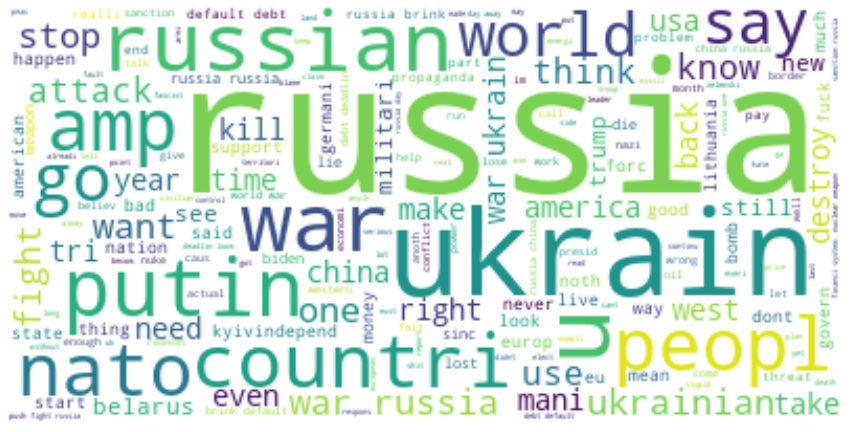

In [13]:
negative =' '.join([i for i in df['tweet'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()